In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 

In [2]:
df = pd.read_csv(r"C:\Users\srivi\Downloads\LoanDataset.csv")

In [3]:
df.head()
#to see what is provided in the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()
#to see the information provided in the dataset- 
#how and what is provided in each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()
#the number of null values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

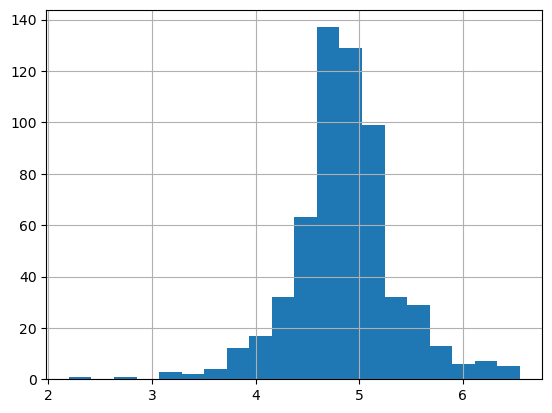

In [6]:
df['loanAmount_log']=np.log(df['LoanAmount'])
#creates a new column of the logs of loan amount 
#a matehmatical function that helps calculate natural logs of x
#where x belong to input array elements

df['loanAmount_log'].hist(bins=20)
#to allow us to see the new column visually 

In [7]:
df.isnull().sum()
#I wanted to see the null values in the newly created column (loanAmount)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

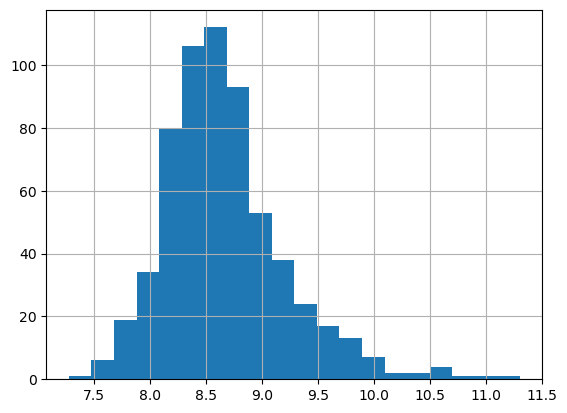

In [8]:
#i want to add a new column 
# the new column is TotalIncome, 
#which is applicant income+co-applicant income)
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome']

#then taking the log of the newly created column
df['TotalIncome_log']= np.log(df['TotalIncome'])

#then displaying the histogram of the new column
df['TotalIncome_log'].hist(bins=20)

In [9]:
# this code fills the gender, married, self_employed, dependents,
# loan_amount_term and credit_history columns 
# with the mode value (most recurring) in the corresponding columns 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# this code fills the loan_amount and loanAmount_log columns 
# with the average value (mean) in the corresponding columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['loanAmount_log'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

#check for the remianing null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

We no longer have any missing values now 

In [10]:
# now that my dataset is cleaner and easier to use
# i will start preparing my dataset for training and testing

x= df.iloc[:,np.r_[1:5,9:11,13:15]].values
y= df.iloc[:,12].values

In [11]:
#checking what my slected x values are
x

array([['Male', 'No', '0', ..., 1.0, 146.41216216216216, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 128.0, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 66.0, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 253.0, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 187.0, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 133.0, 4583.0]], dtype=object)

In [12]:
#checking what my selected y values are
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Number of people who take loans grouped by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


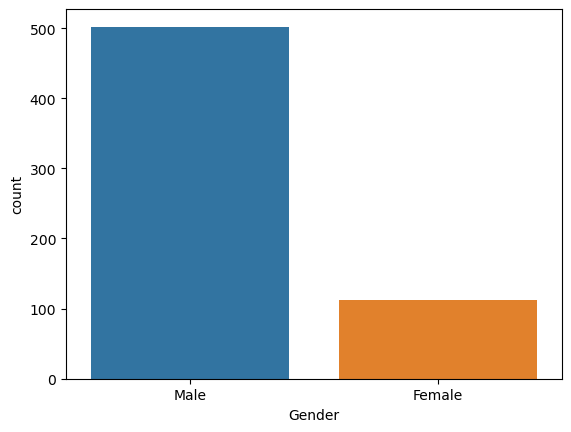

In [13]:
# this code counts and plots a bar graph/plot
# to visualise the number of loan applicants grouped by gender 
print("Number of people who take loans grouped by gender:")
print(df['Gender'].value_counts())

sns.countplot(x='Gender', data=df, hue='Gender')
plt.legend([],[], frameon=False)  
# this last line of code removes redundant legend if not needed


Here, we can see that there are a signicficantly higher number of males that take out loans than females.

Number of people who take loans grouped by marital status:
Married
Yes    401
No     213
Name: count, dtype: int64


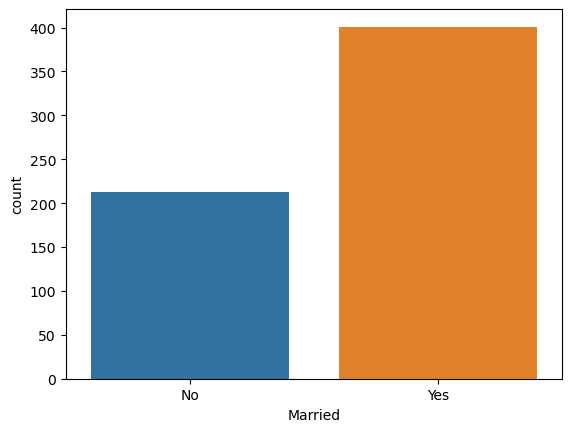

In [15]:
print("Number of people who take loans grouped by marital status:")
print(df['Married'].value_counts())

sns.countplot(x='Married', data=df, hue='Married')
plt.legend([],[], frameon=False)  

Here, we can see that the out of all the people who take out loans, 
the number of people who are married are significantly greater than those who are not.

Number of people who take loans grouped by dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


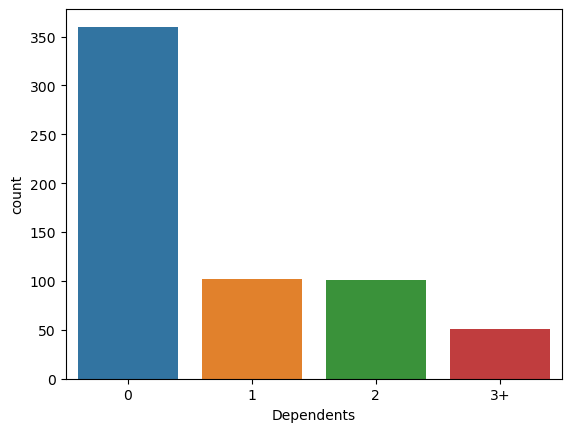

In [17]:
print("Number of people who take loans grouped by dependents:")
print(df['Dependents'].value_counts())

sns.countplot(x='Dependents', data=df, hue='Dependents')
plt.legend([],[], frameon=False)  

This data shows that individuals with no dependents make up the largest group of loan takers (360), significantly outnumbering those with dependents. Among those with dependents, the number decreases as the number of dependents increases, with only 51 loan takers having three of more dependent, indicating a possible correlation between fewer dependents and higher loan-taking capacity or eligibility. 

Number of people who take loans grouped by self employment:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


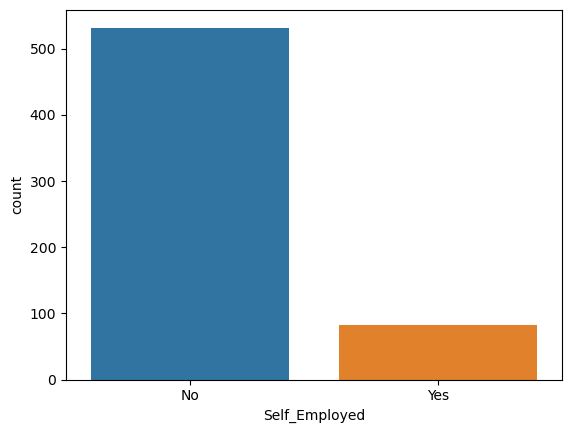

In [19]:
print("Number of people who take loans grouped by self employment:")
print(df['Self_Employed'].value_counts())

sns.countplot(x='Self_Employed', data=df, hue='Self_Employed')
plt.legend([],[], frameon=False)  

The data indicates that the majority of loan takers (532) are not self-employed, while only 82 self-employed individuals have taken loan. This suggests that being employed by an organisaition might take indiviudals more likely or better positioned to secure loans compared to those who are self-employed.

Number of people who take loans grouped by loan amount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


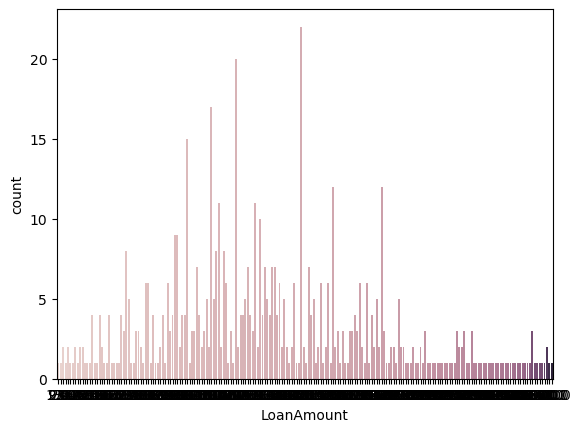

In [21]:
print("Number of people who take loans grouped by loan amount:")
print(df['LoanAmount'].value_counts())

sns.countplot(x='LoanAmount', data=df, hue='LoanAmount')
plt.legend([],[], frameon=False)  

Number of people who take loans grouped by credit history:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


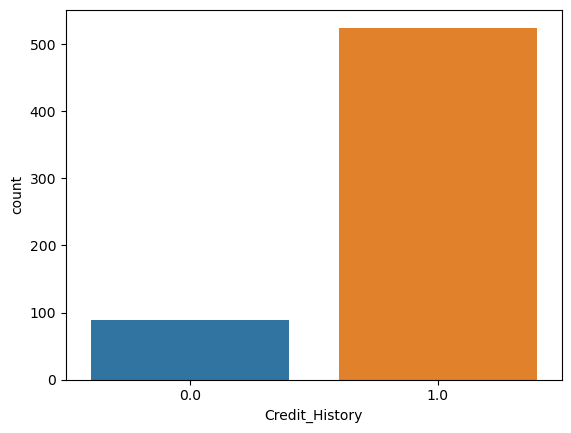

In [22]:
print("Number of people who take loans grouped by credit history:")
print(df['Credit_History'].value_counts())

sns.countplot(x='Credit_History', data=df, hue='Credit_History')
plt.legend([],[], frameon=False)  

The data reveals that the vast majority of loan takers (525) have a positive credit history, while only 89 individuals with no credit history have taken loans. This indicates that having a good credit history is likely a key factor in loan approval.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=0)
#test_size=0.2 ensures that 20% of data is used for testing
#and 80% of data is used for training

#random_state=0 ensures reproducibility 
#by setting a seed for random splitting

X_train = np.array(X_train) #checks if X_train is NumPy array

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()
#labelencoder is being initialised
#used to transform categorical labels or data into numerical values

In [25]:
for i in range(0, 5):
    X_train[:, i]= LabelEncoder_x.fit_transform(X_train[:,i])
    X_train[:,7]= LabelEncoder_x.fit_transform(X_train[:,7])

#this code apllied labelencoder to encoder the first 5 columns 
#(0-4) and the 8th column (7) of X_train
#with numeric labels, overwriting the original data in those columns

X_train

array([[1, 1, 0, ..., 1.0, 131.0, 267],
       [1, 0, 1, ..., 1.0, 196.0, 407],
       [1, 1, 0, ..., 0.0, 149.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 200.0, 363],
       [1, 1, 0, ..., 1.0, 160.0, 273],
       [0, 1, 0, ..., 1.0, 182.0, 301]], dtype=object)

In [26]:
Labelencoder_y= LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

#intialises labelencoder for the target variable y_train
#and transforms its categorical labels into numerical values

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [27]:
for i in range(0, 5):
    X_test[:,i]= LabelEncoder_x.fit_transform(X_test[:,i])
    X_test[:,7]= LabelEncoder_x.fit_transform(X_test[:,7])
#does same thing as before but with x_test set
X_test

array([[1, 0, 0, 0, 5, 1.0, 84.0, 85],
       [0, 0, 0, 0, 5, 1.0, 112.0, 28],
       [1, 1, 0, 0, 5, 1.0, 324.0, 104],
       [1, 1, 0, 0, 5, 1.0, 110.0, 80],
       [1, 1, 2, 0, 5, 1.0, 97.0, 22],
       [1, 1, 0, 1, 3, 0.0, 165.0, 70],
       [1, 1, 3, 0, 3, 1.0, 157.0, 77],
       [1, 0, 0, 0, 5, 1.0, 405.0, 114],
       [1, 0, 0, 0, 5, 0.0, 124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 128.0, 55],
       [0, 0, 0, 0, 5, 1.0, 84.0, 4],
       [1, 1, 1, 0, 5, 1.0, 95.0, 2],
       [0, 0, 0, 0, 5, 1.0, 280.0, 96],
       [1, 1, 2, 0, 5, 1.0, 236.0, 97],
       [1, 1, 0, 0, 5, 1.0, 96.0, 117],
       [1, 1, 1, 0, 5, 1.0, 67.0, 22],
       [1, 0, 1, 1, 5, 1.0, 190.0, 32],
       [1, 0, 0, 1, 5, 1.0, 132.0, 25],
       [0, 0, 0, 0, 5, 1.0, 93.0, 1],
       [1, 1, 0, 1, 5, 0.0, 181.0, 44],
       [0, 1, 0, 0, 5, 0.0, 120.0, 71],
       [1, 1, 0, 0, 5, 1.0, 143.0, 43],
       [1, 1, 2, 0, 5, 1.0, 108.0, 91],
       [1, 1, 2, 0, 5, 1.0, 165.0, 111],
       [1, 1, 0, 0, 5, 1.0, 58.0, 35],
       

In [28]:
LabelEncoder_y= LabelEncoder()

y_test = LabelEncoder_y.fit_transform(y_test)
#does same thing as before but with y_test set

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#StandardScalar removes mean and scales each variable to unit variance

X_train = ss.fit_transform(X_train)
#Fit and transform training data

X_test = ss.transform(X_test)
#Transform test data using the same scaler

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
from sklearn import metrics
y_pred= rf_clf.predict(X_test)

print("accuracy of RFC:", metrics.accuracy_score(y_pred,y_test))

y_pred

accuracy of RFC: 0.7398373983739838


array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [68]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred = nb_clf.predict(X_test)
print("accuracy of GNB:", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of GNB: 0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred = dt_clf.predict(X_test)
print("accuracy of DTC:", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of DTC: 0.5528455284552846


array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [86]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf= KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred = kn_clf.predict(X_test)
print("accuracy of KNC:", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of KNC: 0.7886178861788617


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [92]:
models = {
    "Random Forest": rf_clf,
    "GuassianNB": nb_clf,
    "Decision Tree": dt_clf,
    "K-Neighors": kn_clf,
}

# Dictionary to store predictions
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions[name] = model.predict(X_test)  # Predict on the test data


In [103]:
for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
    print(f"Confusion Matrix for {name}:\n{cm}\n")

    # Optional: Visualize the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=model.classes_)
    plt.show()


Confusion Matrix for Random Forest:
[[18 15]
 [21 69]]

Confusion Matrix for GuassianNB:
[[14 19]
 [ 2 88]]

Confusion Matrix for Decision Tree:
[[22 11]
 [44 46]]

Confusion Matrix for K-Neighors:
[[15 18]
 [ 8 82]]



For a Loan Approval System, the performance priorities are:
- minimisng false negatives: missing elgible borrowers in bad for business, so the model should im to recude FN

- minimising false positives: approving loans for ineligible borrowers is risky so we also want low FP.

Thought process using confusion matrix-
- if recall is critical (avoiding to miss eligible borrowers), choosing GaussianNB is a appropriate decision

- if balanced precision and recall is required, then choosing K-Neighbors is the most appropriate decision

Best Model Based on Accuracy + Confusion Matrix:

- GaussianNB combines the highest accuracy (82.93%) with minimal False Negatives (FN=2). This is critical for a loan approval system because missing eligible borrowers could lead to lost business opportunities.

- KNN has good accuracy (78.86%) and also balances False Positives and False Negatives better than GaussianNB, making it a close second choice.

CONCLUSION:
- Best Overall Model: GaussianNB, because of its highest accuracy and superior recall (very few False Negatives). It prioritizes approving loans for eligible borrowers.
  
- Alternative Choice: KNN, if you prefer a more balanced approach between False Positives and False Negatives.


Ultimately, the decision should align with the system's business priorities:

If recall (minimizing FN) is the top priority: Go with GaussianNB.
If you want balanced performance: Consider KNN.